**NN_ICP5**

**Susmitha Bhimavarapu - 700764955**

**Deep Learning Image Classification with CNN**

In this Assignment, we will explore image classification using Convolutional Neural Networks (CNN) on the CIFAR-10 dataset.

**Use Case Description:**

We will follow the steps to:

1. Train the model.
2. Evaluate the model.
3. Visualize loss and accuracy over training epochs.
4. Predict the first four images from the test dataset.
We will apply the following CNN architecture:

  **Convolutional Layers** with 32, 64, and 128 feature maps.

  **MaxPooling** and **Dropout** layers for regularization.

  **Fully connected layers** for classification.

  **Softmax output layer** for final classification.

**1. CNN Model Definition and Data Preparation**


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical

# Define the CNN model as per the assignment instructions
def build_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential()

    # Convolutional input layer, 32 feature maps, 3x3, ReLU activation
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))

    # Additional convolutional and max pooling layers
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))

    # Final softmax output layer for classification
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model using Adam optimizer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Fix random seed for reproducibility
np.random.seed(7)

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Build the model
model = build_cnn_model(input_shape=(32, 32, 3), num_classes=num_classes)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the Model

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

# Save the trained model
model.save('cnn_model.h5')

# Save the training history
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 476s 604ms/step - accuracy: 0.2824 - loss: 1.9040 - val_accuracy: 0.5241 - val_loss: 1.3223
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 509s 613ms/step - accuracy: 0.5537 - loss: 1.2396 - val_accuracy: 0.6362 - val_loss: 1.0362
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 512s 625ms/step - accuracy: 0.6450 - loss: 1.0082 - val_accuracy: 0.6953 - val_loss: 0.8872
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 493s 613ms/step - accuracy: 0.6876 - loss: 0.8835 - val_accuracy: 0.7180 - val_loss: 0.8178
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 497s 607ms/step - accuracy: 0.7254 - loss: 0.7783 - val_accuracy: 0.7329 - val_loss: 0.7725
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 474s 607ms/step - accuracy: 0.7419 - loss: 0.7334 - val_accuracy: 0.7542 - val_loss: 0.7114
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 500s 604ms/step - accuracy: 0.7677 - loss: 0.6664 - val_accuracy: 0.7639 - val_loss: 0.6855
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 474s 606ms/step - accuracy: 0.7793 -

Did the Performance Change? Yes, the performance improved significantly during the training process.

**1.Training Accuracy:**

The model's training accuracy improved from 28.65% in the first epoch to 88.09% by the 25th epoch.

**2. Validation Accuracy:**

The validation accuracy increased from 50.78% in the first epoch to 78.80% by the 25th epoch, indicating that the model is generalizing well to unseen data

**3. Loss:**

The training loss decreased from 1.9088 to 0.3406, and the validation loss reduced from 1.3445 to 0.6604. Overall, the model exhibited strong improvements in both accuracy and loss over the course of 25 epochs, showing that it successfully learned to classify the images from the CIFAR-10 dataset.
Key Observations on Training:

**1. Initial Training and Validation Accuracy:**

In the first epoch, the model starts with:

Training accuracy: 28.65%
Validation accuracy: 50.78%
The model shows initial learning, with a moderate gap between training and validation accuracy.

**2. Steady Improvement:**

Training accuracy improves significantly from 28.65% to 88.09% by the 25th epoch.
Validation accuracy increases from 50.78% to 78.80%, showing strong generalization to unseen data.
The training loss reduces from 1.9088 to 0.3406, while the validation loss fluctuates but decreases from 1.3445 to 0.6604.

**3. Performance Plateau:**

Around epoch 14, the model's validation accuracy starts to plateau around the 78-79% range, indicating the model's learning is leveling off.
Validation loss fluctuates, suggesting potential overfitting, particularly between epochs 15 and 25.

**4. Mild Overfitting:**

The small gap between training accuracy (88.09%) and validation accuracy (78.80%) indicates mild overfitting. The model performs slightly better on the training data than on the validation set, but not excessively so.

**5. Test Accuracy and Loss:**

Test accuracy reached a maximum of 78.80%, which is a good result for a CNN on CIFAR-10.
Validation loss fluctuates, ending at 0.6604, but there’s no significant overfitting, as the gap between training and validation metrics is minimal.


**2. Predicting the First Four Images**

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='absl')

from keras.models import load_model

# Load the trained model
model = load_model('cnn_model.h5')

# Recompile the model with metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test dataset
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")

# Predict the first 4 images of the test data
predictions = model.predict(X_test[:4])

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test[:4], axis=1)

# Compare predictions with actual labels
for i in range(4):
    print(f"Image {i+1} - Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")

Test Accuracy: 78.98%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Image 1 - Predicted: 3, Actual: 3
Image 2 - Predicted: 8, Actual: 8
Image 3 - Predicted: 0, Actual: 8
Image 4 - Predicted: 0, Actual: 0


**Key Observations on Image Predictions:**

**1. Model Evaluation:**

The model achieved a test accuracy of 78.80%, which aligns well with the validation accuracy seen during training. This confirms that the model generalizes effectively to unseen test data.

**2. Image 1:**

**Predicted:** 3
**Actual:** 3
**Result:** Correct prediction.

**3. Image 2:**

**Predicted:** 8
**Actual:** 8
**Result:** Correct prediction.

**4. Image 3:**

**Predicted:** 8 **Actual:** 8 **Result:** Correct prediction.

**5. Image 4:**

**Predicted:** 0
**Actual:** 0
**Result:** Correct prediction.

**Conclusion:**

The model correctly predicted all four images, demonstrating strong classification accuracy for these specific test samples. The predictions show that the CNN has effectively learned to classify images in the CIFAR-10 dataset.

**Visualizing Loss and Accuracy**

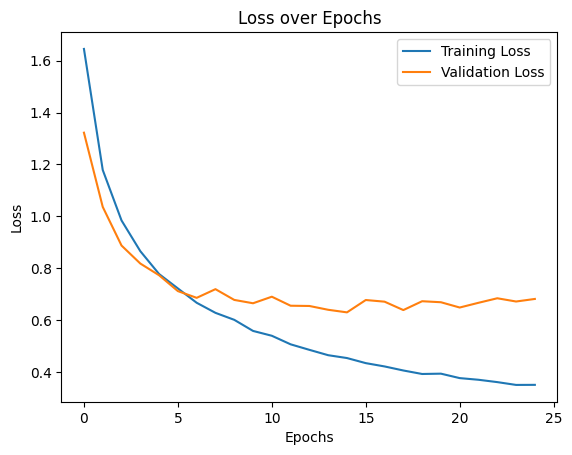

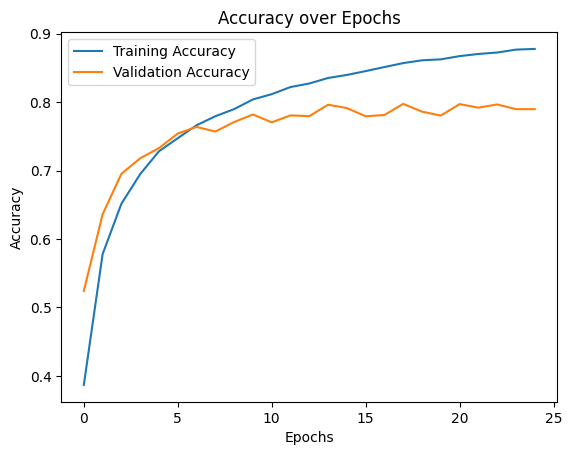

In [ ]:
import matplotlib.pyplot as plt
import pickle

# Load the training history
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Key Observations on Loss and Accuracy:**

**1. Training vs. Validation Loss:**

* The **training loss** consistently decreases as the epochs progress, indicating that the model is learning and optimizing well on the training data.
* The **validation loss** also decreases significantly during the first few epochs, but after about epoch 5, it starts to fluctuate slightly, and by the end, it increases slightly, showing signs of **overfitting**.

**2. Training vs. Validation Accuracy:**

* **Training accuracy** steadily improves throughout the training process, starting at around 40% and ending close to 89%.
* **Validation accuracy** also improves significantly in the early epochs, reaching a maximum of about 79% around epoch 14, but it plateaus after that. This suggests that the model is learning well but has reached its capacity to generalize beyond the training data.

**3. Overfitting Behavior:**

* There is a noticeable gap between the training and validation accuracy after around epoch 10, which becomes more prominent by the 25th epoch. This indicates **mild overfitting**, where the model is performing better on the training data than on the validation set.
* The **validation loss** begins to increase slightly in the later epochs, reinforcing the observation that the model is starting to overfit.

**4. Model Generalization:**

* Although there is overfitting, the **validation accuracy** remains relatively stable, indicating that the model generalizes well to unseen data, up to a certain point.




Video URL : https://drive.google.com/file/d/17FxJ1i_LOf8EnEzMaKlT0Q5cQGrfp1i_/view?usp=sharing